# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nico Lee Nathanael Handoko
- **Email:** new.nikolee2007@gmail.com
- **ID Dicoding:** MS058D5Y0580

## Menentukan Pertanyaan Bisnis

- Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?
- Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?

## Import Semua Packages/Library yang Digunakan

In [5]:
%pip install -r requirements.txt
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan data yang akan digunakan untuk analisis data. Data yang digunakan adalah data pemesanan E-Commerce yang dilakukan pada "Olist Store". Data ini dapat diunduh dari [Google Drive](https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view).
Kode di bawah ini akan membaca data dari file CSV yang telah diunduh menjadi DataFrame nya masing masing.

In [6]:
import pandas as pd

order_details_df = pd.read_csv("./data/order_items_dataset.csv")
reviews_df = pd.read_csv("./data/order_reviews_dataset.csv")
orders_df = pd.read_csv("./data/orders_dataset.csv")
products_df = pd.read_csv("./data/products_dataset.csv")
geolocation_df = pd.read_csv("./data/geolocation_dataset.csv")
sellers_df = pd.read_csv("./data/sellers_dataset.csv")
order_pay_df = pd.read_csv("./data/order_payments_dataset.csv")
customers_df = pd.read_csv("./data/customers_dataset.csv")
category_df = pd.read_csv("./data/product_category_name_translation.csv")

In [7]:
combined_df = pd.merge(
    left=orders_df,
    right=order_details_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=order_pay_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=customers_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=reviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=products_df,
    how="inner",
    left_on="product_id",
    right_on="product_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=sellers_df,
    how="inner",
    left_on="seller_id",
    right_on="seller_id",
)
combined_df = pd.merge(
    left=combined_df,
    right=category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name",
)

combined_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,468.0,3.0,450.0,30.0,10.0,20.0,31842,belo horizonte,MG,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,316.0,4.0,250.0,51.0,15.0,15.0,8752,mogi das cruzes,SP,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,060cb19345d90064d1015407193c233d,...,608.0,1.0,7150.0,65.0,10.0,65.0,7112,guarulhos,SP,auto
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1,a1804276d9941ac0733cfd409f5206eb,...,NaN,NaN,600.0,35.0,35.0,15.0,5455,sao paulo,SP,NaN
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,...,956.0,1.0,50.0,16.0,16.0,17.0,12940,atibaia,SP,auto


**Insight:**
1. Data yang Digunakan:
   - Dataset berasal dari transaksi e-commerce Olist Store, berisi informasi tentang pesanan, pelanggan, produk, pembayaran, ulasan, dan penjual.
2. Penggabungan Data:
   - Menggunakan pd.read_csv() untuk membaca berbagai file CSV.
   - Melakukan merge pada beberapa DataFrame berdasarkan order_id dan customer_id untuk membentuk satu DataFrame utama (combined_df).
3. Jenis Data yang Digabungkan:
   - Order Details: Informasi detail pesanan.
   - Reviews: Ulasan pelanggan terkait pesanan.
   - Order Payments: Data pembayaran untuk setiap pesanan.
   - Customers: Informasi pelanggan, termasuk lokasi.
   - Products: Detail produk yang dibeli.

## Assessing Data

In [8]:
#Informasi Dasar Dataset
combined_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [9]:
combined_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
count,117329,117329,117329,117329,117314,116094,114858,117329,117329.000000,117329,...,115634.000000,115634.000000,117309.000000,117309.000000,117309.000000,117309.000000,117329.000000,117329,117329,115609
unique,97916,97916,7,97370,89533,80449,95021,449,NaN,32789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611,23,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,bed_bath_table
freq,63,63,114859,63,63,63,63,652,NaN,533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29048,83671,11847
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.194121,NaN,...,785.802861,2.205528,2110.763062,30.254456,16.612476,23.071452,24450.781955,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.684225,NaN,...,652.382965,1.717783,3785.128931,16.177519,13.452625,11.745875,27582.364358,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28035.000000,NaN,NaN,NaN


In [10]:
combined_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             103437


**Insight**
1. Ukuran Dataset:
   - Memiliki 117.329 entri dan 40 kolom, mencakup berbagai aspek transaksi e-commerce.
2. Tipe Data:
   - Sebagian besar kolom berupa string (object), terutama ID, kategori, dan status.
   - Kolom numerik seperti harga (price), biaya pengiriman (freight_value), dan berat produk (product_weight_g).
   - Terdapat banyak tanggal dan waktu yang bisa digunakan untuk analisis tren.
   - Missing Values (Data Hilang):
3. Kolom yang banyak missing values:
   - order_delivered_carrier_date (1.235) dan order_delivered_customer_date (2.471):
   - Indikasi pesanan yang belum dikirim atau gagal terkirim.
   - review_comment_title (103.437) dan review_comment_message (67.650):
   - Sebagian besar pesanan tidak memiliki komentar review, hanya rating.
   - product_category_name (1.695) dan product_category_name_english (1.720):
   - Beberapa produk tidak memiliki kategori yang jelas.
   - product_weight_g, product_length_cm, product_height_cm, product_width_cm (20 masing-masing):
   - Ada produk dengan informasi dimensi atau berat yang tidak tersedia.
4. Distribusi Data:
   - Kolom order_status memiliki 7 kategori, dengan status "delivered" kemungkinan besar paling dominan.
   - Jumlah installment (payment_installments) berkisar dari 1 hingga beberapa kali cicilan, menunjukkan preferensi pelanggan dalam pembayaran.
   - Jumlah produk dalam satu pesanan (order_item_id) berkisar dari 1 hingga 21, dengan mayoritas pesanan memiliki satu item.
   - Rating (review_score) tersedia untuk semua pesanan, tetapi sebagian besar tanpa komentar.

## Cleaning Data

In [11]:
#Menampilkan semua kolom dari tabel E-commerce
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [12]:
#Mengganti nama kolom product_name_lenght menjadi product_name_length
combined_df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)
combined_df.rename(columns={'product_description_lenght': 'product_description_length'}, inplace=True)

In [13]:
#Mengganti tipe data pada kolom yang menggunakan tanggal menjadi DateTime  
combined_df['order_approved_at'] = pd.to_datetime(combined_df['order_approved_at'])
combined_df['order_purchase_timestamp'] = pd.to_datetime(combined_df['order_purchase_timestamp'])
combined_df['order_delivered_customer_date'] = pd.to_datetime(combined_df['order_delivered_customer_date'])
combined_df['order_delivered_carrier_date'] = pd.to_datetime(combined_df['order_delivered_carrier_date'])
combined_df['order_estimated_delivery_date'] = pd.to_datetime(combined_df['order_estimated_delivery_date'])
combined_df['shipping_limit_date'] = pd.to_datetime(combined_df['shipping_limit_date'])
combined_df['review_creation_date'] = pd.to_datetime(combined_df['review_creation_date'])
combined_df['review_answer_timestamp'] = pd.to_datetime(combined_df['review_answer_timestamp'])

In [14]:
#Menampilkan jumlah missing value setiap kolom 
combined_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             103437


In [15]:
#menghapus produk dengan data wajib yang tidak lengkap
columns_to_drop = [
    'product_category_name', 'product_name_length', 'product_description_length',
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 
    'product_height_cm', 'product_width_cm', 'order_approved_at'
]
combined_df = combined_df.dropna(subset=columns_to_drop)

#Mengisi Nilai missing pada kolom review_comment_title, review_comment_message dan product_category_name_english dengan "No Data"
combined_df['review_comment_message'] = combined_df['review_comment_message'].fillna('No Data')
combined_df['product_category_name_english'] = combined_df['product_category_name_english'].fillna('No Data')
combined_df['review_comment_title'] = combined_df['review_comment_title'].fillna('No Data')

In [16]:
#Mengisi nilai pada kolom numerik yang hilang dengan median
median_product_weight = combined_df[combined_df['product_weight_g'] != 0]['product_weight_g'].median()
median_payment_value = combined_df[combined_df['payment_value'] != 0]['payment_value'].median()
combined_df.loc[combined_df['product_weight_g'] == 0, 'product_weight_g'] = median_product_weight
combined_df.loc[combined_df['payment_value'] == 0, 'payment_value'] = median_payment_value

In [17]:
combined_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1197
order_delivered_customer_date    2402
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
review_id                           0
review_score                        0
review_comment_title                0
review_comment_message              0
review_creat

In [18]:
#Memeriksa dan menghapus jumlah duplikasi jika ada
duplicate_count = combined_df.duplicated().sum()
print(f"\nJumlah duplikasi sebelum penghapusan: {duplicate_count}")

combined_df = combined_df.drop_duplicates()

duplicate_count_after = combined_df.duplicated().sum()
print(f"Jumlah duplikasi setelah penghapusan: {duplicate_count_after}")


Jumlah duplikasi sebelum penghapusan: 0
Jumlah duplikasi setelah penghapusan: 0


In [19]:
#Menampilkan info kolom data setelah proses cleaning data
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115619 entries, 0 to 117328
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115619 non-null  object        
 1   customer_id                    115619 non-null  object        
 2   order_status                   115619 non-null  object        
 3   order_purchase_timestamp       115619 non-null  datetime64[ns]
 4   order_approved_at              115619 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114422 non-null  datetime64[ns]
 6   order_delivered_customer_date  113217 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115619 non-null  datetime64[ns]
 8   order_item_id                  115619 non-null  int64         
 9   product_id                     115619 non-null  object        
 10  seller_id                      115619 non-null  object        
 11  shipp

**Insight**

1. Perbaikan Nama Kolom
   - Memperbaiki penulisan nama kolom product_name_lenght dan product_description_lenght menjadi product_name_length dan product_description_length.
    
2. Konversi Kolom ke Format Datetime
   - Mengonversi beberapa kolom tanggal seperti order_approved_at, order_purchase_timestamp, order_delivered_customer_date, shipping_limit_date ke format datetime.

3. Menangani Missing Data
   - Menghapus data dengan missing value pada kolom wajib seperti product_weight_g, product_length_cm, product_photos_qty, order_approved_at
   - Mengisi missing value dengan "No Data" pada kolom review_comment_message, review_comment_title, dan product_category_name_english
   - Mengganti nilai nol pada product_weight_g dan payment_value dengan nilai median untuk menghindari kesalahan analisis akibat nilai nol

4. Menghapus Duplikasi Data
   - Menghapus duplikasi data agar tidak menampilkan data yang lebih besar akibat data ganda 

## Exploratory Data Analysis (EDA)

Berikut pertanyaan bisnis yang telah ditentukan:
- Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?
- Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?

**Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?**

Langkah - langkah analisis data:
1. Memeriksa data
2. Menghitung jumlah penjualan dan revenue per kategori
3. Menggabungkan hasil analisis
4. Menentukan kategori terbaik
5. Visualisasi

In [20]:
# Memeriksa nilai yang hilang di kolom yang diperlukan
required_columns = ['product_category_name_english', 'order_id', 'payment_value']
missing_values = combined_df[required_columns].isna().sum()
print(missing_values)

product_category_name_english    0
order_id                         0
payment_value                    0
dtype: int64


In [21]:
# Menghitung jumlah penjualan per kategori produk
sales_per_category = combined_df.groupby('product_category_name_english')['order_id'].count().reset_index()
sales_per_category.columns = ['product_category_name_english', 'total_sales']

In [22]:
# Menghitung total revenue per kategori produk
revenue_per_category = combined_df.groupby('product_category_name_english')['payment_value'].sum().reset_index()
revenue_per_category.columns = ['product_category_name_english', 'total_revenue']

In [23]:
# Menggabungkan hasil analisis jumlah penjualan dan revenue
combined_analysis = pd.merge(sales_per_category, revenue_per_category, on='product_category_name_english')

In [24]:
# Menentukan kategori produk yang paling banyak terjual
top_sales_category = combined_analysis.loc[combined_analysis['total_sales'].idxmax()]

# Menentukan kategori produk yang memberikan revenue tertinggi
top_revenue_category = combined_analysis.loc[combined_analysis['total_revenue'].idxmax()]

print("Kategori produk yang paling banyak terjual:")
print(top_sales_category)

print("\nKategori produk yang memberikan revenue tertinggi:")
print(top_revenue_category)

Kategori produk yang paling banyak terjual:
product_category_name_english    bed_bath_table
total_sales                               11846
total_revenue                        1725308.48
Name: 8, dtype: object

Kategori produk yang memberikan revenue tertinggi:
product_category_name_english    bed_bath_table
total_sales                               11846
total_revenue                        1725308.48
Name: 8, dtype: object


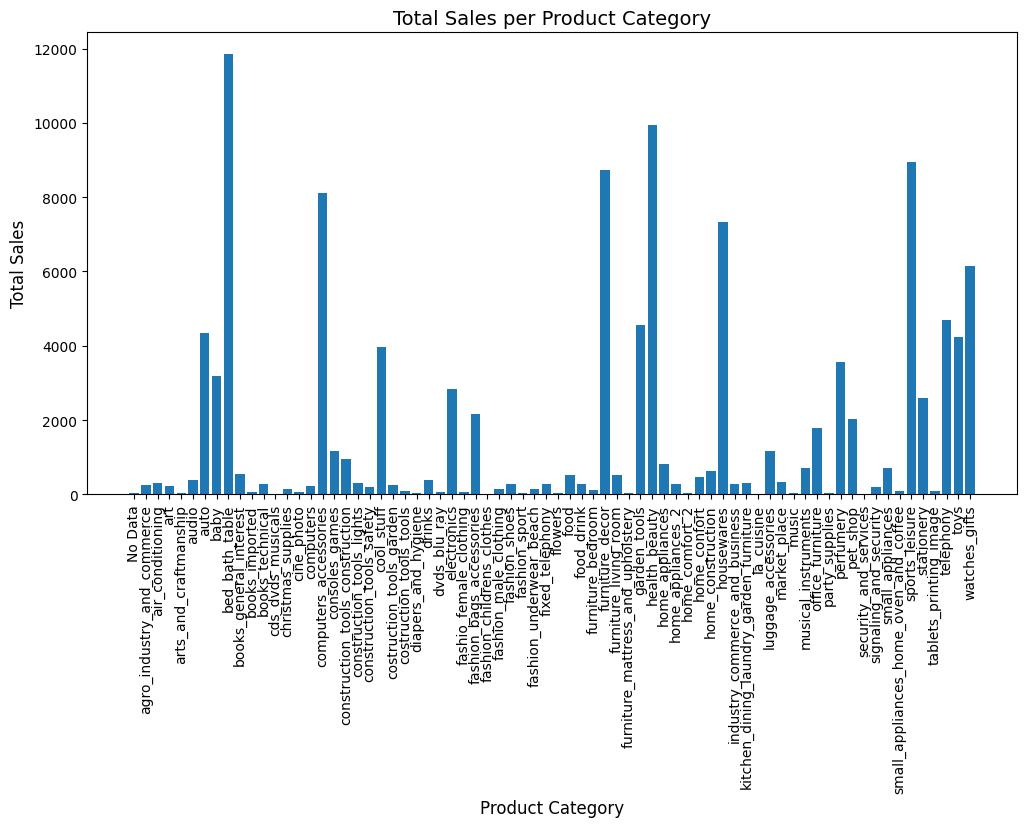

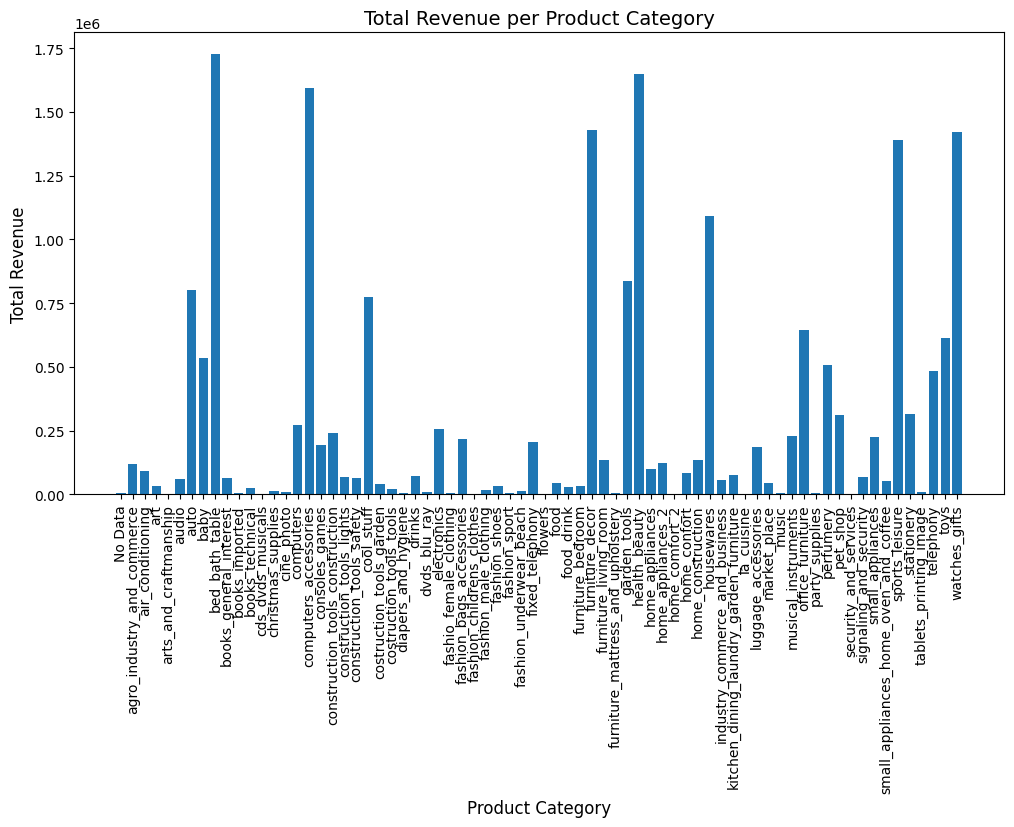

In [25]:
import matplotlib.pyplot as plt

# Visualisasi jumlah penjualan per kategori
plt.figure(figsize=(12, 6))
plt.bar(sales_per_category['product_category_name_english'], sales_per_category['total_sales'])
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales per Product Category', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Visualisasi revenue per kategori
plt.figure(figsize=(12, 6))
plt.bar(revenue_per_category['product_category_name_english'], revenue_per_category['total_revenue'])
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Total Revenue per Product Category', fontsize=14)
plt.xticks(rotation=90)
plt.show()

**Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?**

Langkah - langkah analisis:
1. Menghitung distribusi ulasan berdasarkan rating
2. Menghitung waktu pengiriman
3. Menghitung korelasi antara rating dan waktu pengiriman
4. Visualisasi distribusi ulasan berdasarkan rating dan korelasi antara rating dan waktu pengiriman

In [26]:
#Menghitung distribusi ulasan berdasarkan rating
rating_distribution = combined_df['review_score'].value_counts().sort_index().reset_index()
rating_distribution.columns = ['review_score', 'count']
print(rating_distribution)

   review_score  count
0             1  14553
1             2   4021
2             3   9720
3             4  21951
4             5  65374


In [27]:
# Menghitung waktu pengiriman dalam hari
combined_df['order_purchase_timestamp'] = pd.to_datetime(combined_df['order_purchase_timestamp'])
combined_df['order_delivered_customer_date'] = pd.to_datetime(combined_df['order_delivered_customer_date'])
combined_df['delivery_time_days'] = (combined_df['order_delivered_customer_date'] - combined_df['order_purchase_timestamp']).dt.days

In [28]:
# Menghitung korelasi antara rating dan waktu pengiriman
correlation = combined_df[['review_score', 'delivery_time_days']].corr()
print(correlation)

                    review_score  delivery_time_days
review_score            1.000000           -0.303385
delivery_time_days     -0.303385            1.000000


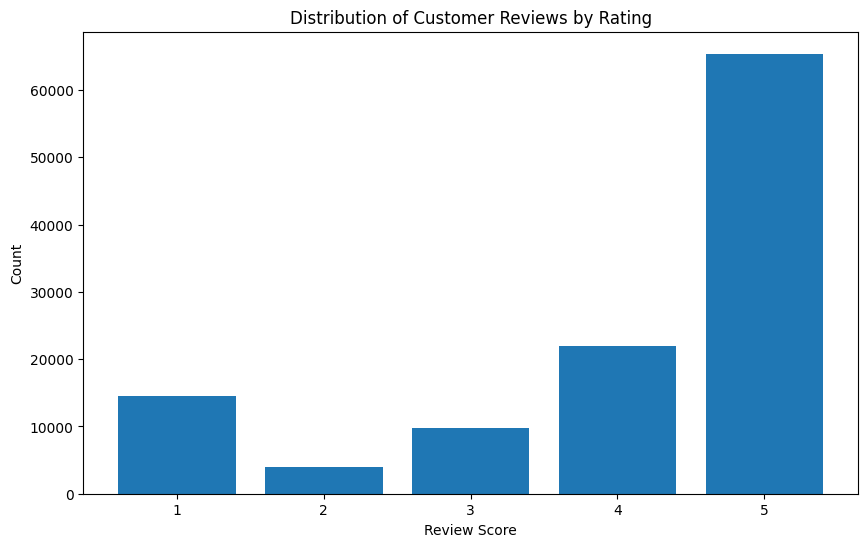

In [29]:
import matplotlib.pyplot as plt

# Visualisasi distribusi ulasan berdasarkan rating
plt.figure(figsize=(10, 6))
plt.bar(rating_distribution['review_score'], rating_distribution['count'])
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Customer Reviews by Rating')
plt.show()

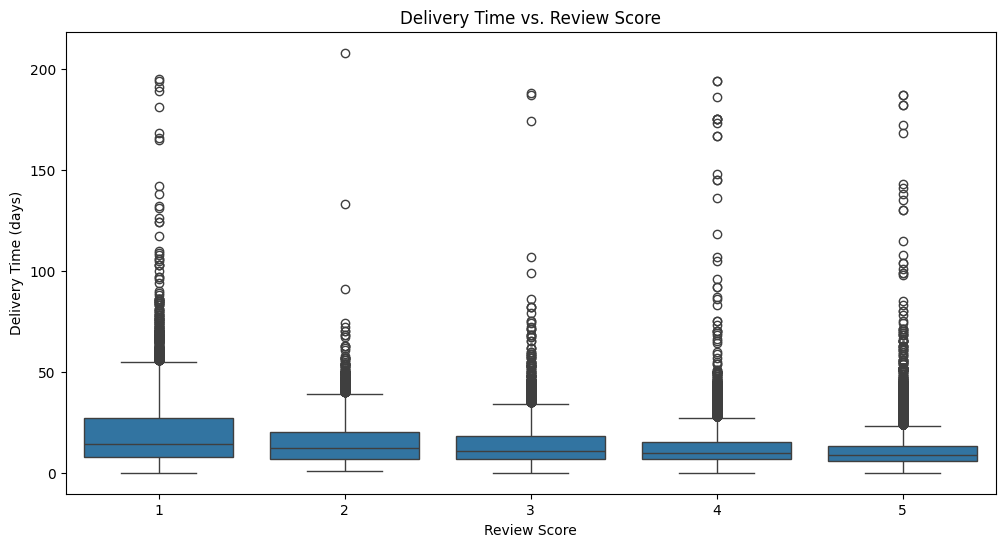

In [30]:
import seaborn as sns

# Visualisasi hubungan antara rating dan waktu pengiriman
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='delivery_time_days', data=combined_df)
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Time vs. Review Score')
plt.show()

**Insight**
1. Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?
   - Kategori "bed_bath_table" adalah produk yang paling unggul, karena memiliki jumlah penjualan tertinggi sekaligus memberikan kontribusi revenue terbesar. Selain itu, kategori "health_beauty" juga menghasilkan revenue yang tinggi, meskipun volume penjualannya lebih rendah, yang menunjukkan harga rata-rata produk di kategori ini lebih mahal.
2. Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?
   - Distribusi ulasan pelanggan menunjukkan bahwa mayoritas pelanggan memberikan rating 5, diikuti oleh rating 4, sementara rating 2 dan 3 adalah yang paling jarang muncul. Berdasarkan boxplot Delivery Time vs. Review Score, rating rendah (1 dan 2) memiliki lebih banyak outlier dengan waktu pengiriman yang sangat lama, yang mungkin berkontribusi pada ketidakpuasan pelanggan. Sebaliknya, pelanggan dengan rating tinggi (4 dan 5) cenderung menerima pengiriman tepat waktu.

## Visualization & Explanatory Analysis

# Pertanyaan 1

### Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?

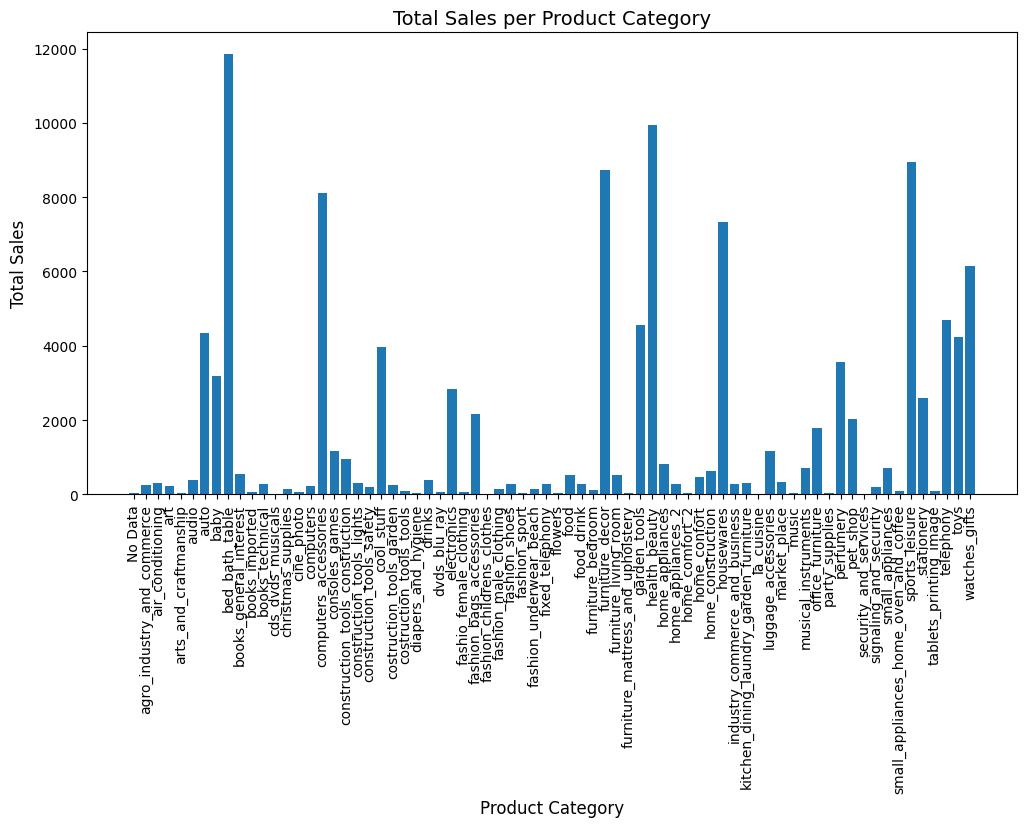

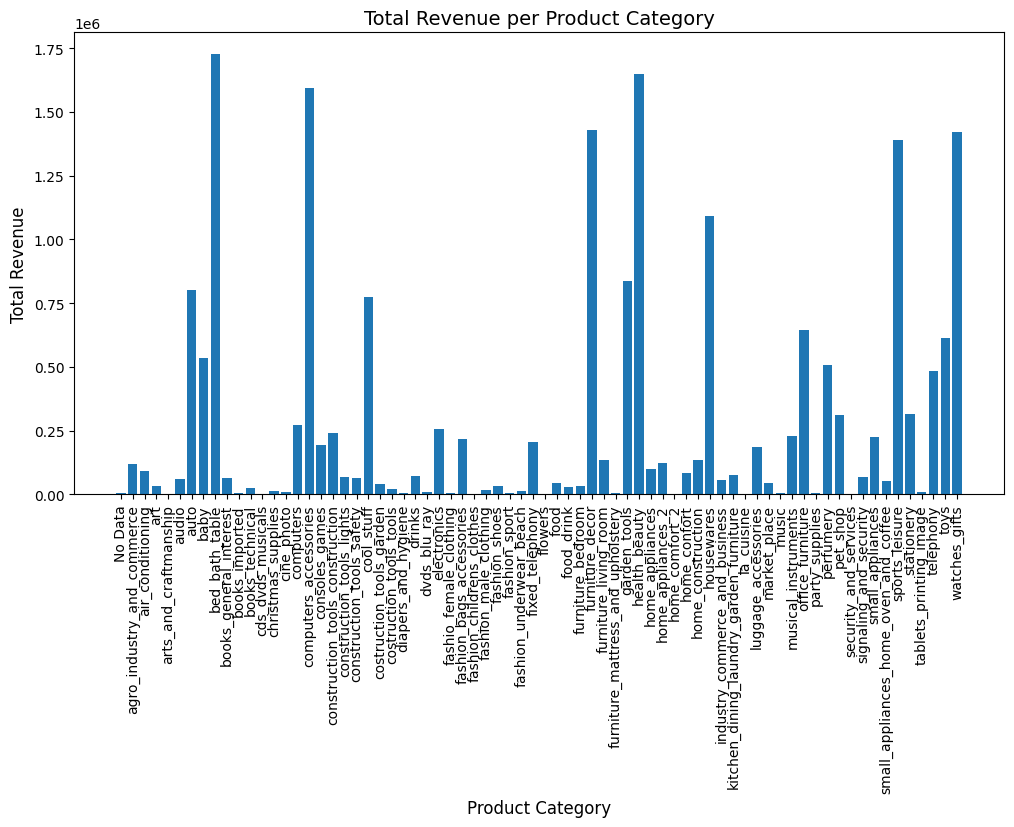

In [31]:
import matplotlib.pyplot as plt

# Visualisasi jumlah penjualan per kategori
plt.figure(figsize=(12, 6))
plt.bar(sales_per_category['product_category_name_english'], sales_per_category['total_sales'])
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Total Sales per Product Category', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Visualisasi revenue per kategori
plt.figure(figsize=(12, 6))
plt.bar(revenue_per_category['product_category_name_english'], revenue_per_category['total_revenue'])
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.title('Total Revenue per Product Category', fontsize=14)
plt.xticks(rotation=90)
plt.show()

# Pertanyaan 2

### Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?

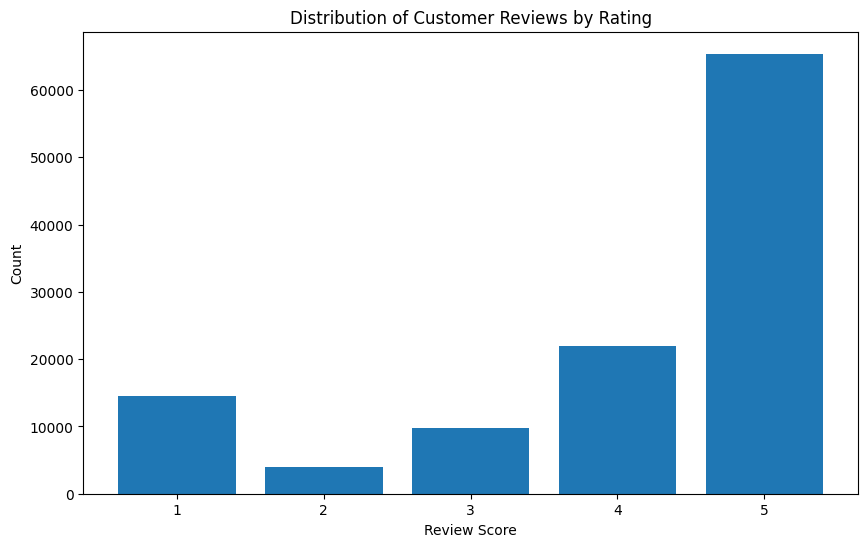

In [32]:
import matplotlib.pyplot as plt

# Visualisasi distribusi ulasan berdasarkan rating
plt.figure(figsize=(10, 6))
plt.bar(rating_distribution['review_score'], rating_distribution['count'])
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Customer Reviews by Rating')
plt.show()

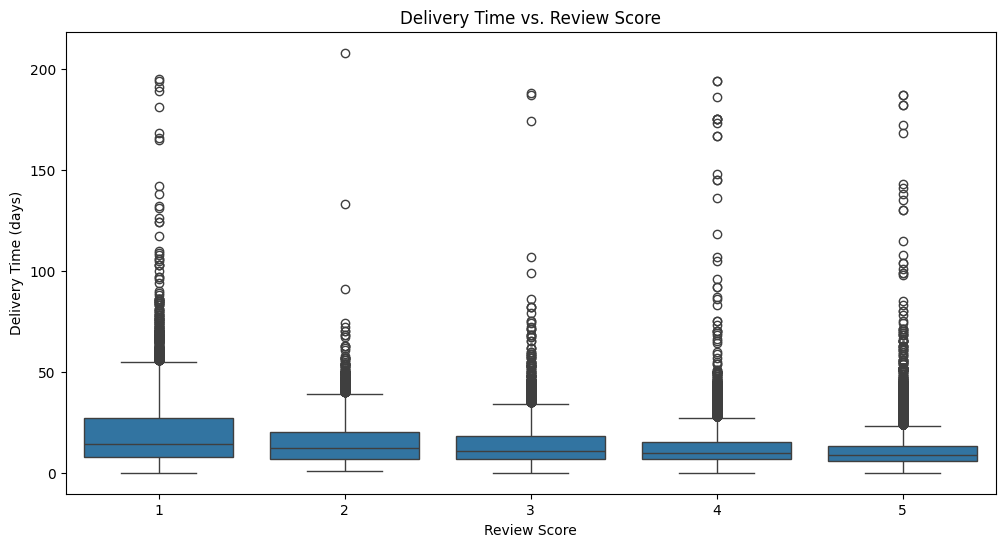

In [33]:
import seaborn as sns

# Visualisasi hubungan antara rating dan waktu pengiriman
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='delivery_time_days', data=combined_df)
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Time vs. Review Score')
plt.show()

**Insight**
1. Kategori yang paling banyak terjual dan memberikan revenue tertinggi
   - Kategori "bed_bath_table" tercatat sebagai produk paling banyak terjual, yang menunjukkan bahwa kebutuhan rumah tangga sangat populer di kalangan konsumen. Di sisi lain, kategori "health_beauty" menghasilkan revenue tertinggi, mengindikasikan bahwa produk kecantikan dan kesehatan memiliki nilai jual tinggi, meski volume penjualannya lebih rendah dibanding kategori lainnya.
2. Distribusi Ulasan Pelanggan dan Hubungan dengan Waktu Pengiriman
   - Sebagian besar ulasan pelanggan memberikan rating 5 dan 4, menunjukkan kepuasan tinggi, sementara rating 1 cukup signifikan, menandakan ketidakpuasan. Rating rendah 1 dan 2 umumnya terkait dengan waktu pengiriman yang lebih lama dan banyak keterlambatan (outlier hingga 200 hari). Sebaliknya, rating tinggi 4 dan 5 berhubungan dengan pengiriman yang lebih tepat waktu.

## Conclusion

### Produk kategori apa yang paling banyak terjual dan memberikan revenue tertinggi?
   - Kategori "bed_bath_table" adalah yang paling populer, dengan jumlah penjualan tertinggi. Hal ini menunjukkan bahwa kebutuhan rumah tangga seperti peralatan tempat tidur dan kamar mandi sangat diminati oleh konsumen. Sementara itu, kategori "health_beauty" menghasilkan revenue tertinggi, meskipun volume penjualannya tidak sebesar kategori lainnya. Ini mengindikasikan bahwa produk di kategori ini memiliki harga rata-rata lebih tinggi, menjadikannya kategori yang berpotensi memberikan margin keuntungan besar.
### Bagaimana distribusi ulasan pelanggan berdasarkan rating, dan apakah ada korelasi antara rating dengan waktu pengiriman?
   - Mayoritas ulasan pelanggan memberikan rating 5, yang menunjukkan kepuasan tinggi secara keseluruhan. Namun, analisis hubungan antara waktu pengiriman dan rating mengungkapkan bahwa rating rendah 1 atau 2 cenderung terjadi ketika waktu pengiriman lebih lama dan banyak keterlambatan (outlier hingga 200 hari). Sebaliknya, pengiriman yang cepat berkontribusi pada rating lebih tinggi 4 atau 5 (kurang dari 50 hari).